In [194]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [225]:
#I read train and test
train = pd.read_csv(os.path.join('C:/Users/Q7835/Documents/GitHub/titanic', 'train.csv'))
test = pd.read_csv(os.path.join('C:/Users/Q7835/Documents/GitHub/titanic', 'test.csv'))

In [211]:
#veo la info del fichero, NaN?
train.info()

True

In [140]:
#File has 12 variables
#Embarked, Cabin, Age have missing values
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [141]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
train["Survived"].value_counts(normalize = True) 
# 38.38% as I saw using describe() 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [143]:
# I analyze survived vs others (one by one)
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['mean', 'count'])
#the better class the better survived

Survived      
            mean count
Pclass                
1       0.629630   216
2       0.472826   184
3       0.242363   491

In [144]:
#I strongly believe that missing values is because of person didn't survived,
#I am 
train['Embarked_missing'] = train['Embarked'].fillna('X')
train['Cabin_missing'] = train['Cabin'].fillna('MM')
train['Age_missing'] = train['Age'].fillna(0)

In [145]:
#Missing in Embarked is better
train['Survived'].groupby(train['Embarked_missing']).agg(['mean', 'count'])

,mean,count
Embarked_missing,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644
X,1.000000,2


In [146]:
#Missing in age is better (I was wrong)
train['Survived'].groupby(train['Age_missing']).agg(['mean', 'count'])

,mean,count
Age_missing,,
0.00,0.293785,177
0.42,1.000000,1
0.67,1.000000,1
0.75,1.000000,2
0.83,1.000000,2
0.92,1.000000,1
1.00,0.714286,7
2.00,0.300000,10
3.00,0.833333,6


In [147]:
#Missing cabin is worse --> I create a new cathegory for them
train['Survived'].groupby(train['Cabin_missing']).agg(['mean', 'count'])

,mean,count
Cabin_missing,,
A10,0.000000,1
A14,0.000000,1
A16,1.000000,1
A19,0.000000,1
A20,1.000000,1
A23,1.000000,1
A24,0.000000,1
A26,1.000000,1
A31,1.000000,1


In [148]:
#1 way
train['Survived'].groupby(train['Sex']).agg(['mean', 'count'])
#Women survived more

,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


In [149]:
#other way
train[['Sex','Survived']].groupby(['Sex'],as_index=False).agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

In [150]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).agg(['mean', 'count'])
#nº siblings: is better to have but the more sibings the worse survived

Survived      
           mean count
SibSp                
0      0.345395   608
1      0.535885   209
2      0.464286    28
3      0.250000    16
4      0.166667    18
5      0.000000     5
8      0.000000     7

In [213]:
train[['Fare','Survived']].groupby(['Fare'], as_index=False).agg(['mean', 'count'])
#The more the better but is not clear

Survived      
              mean count
Fare                    
0.0000    0.066667    15
4.0125    0.000000     1
5.0000    0.000000     1
6.2375    0.000000     1
6.4375    0.000000     1
6.4500    0.000000     1
6.4958    0.000000     2
6.7500    0.000000     2
6.8583    0.000000     1
6.9500    0.000000     1
6.9750    0.500000     2
7.0458    0.000000     1
7.0500    0.000000     7
7.0542    0.000000     2
7.1250    0.000000     4
7.1417    1.000000     1
7.2250    0.250000    12
7.2292    0.266667    15
7.2500    0.076923    13
7.3125    0.000000     1
7.4958    0.333333     3
7.5208    0.000000     1
7.5500    0.250000     4
7.6292    0.000000     1
7.6500    0.250000     4
7.7250    0.000000     1
7.7292    0.000000     1
7.7333    0.500000     4
7.7375    0.500000     2
7.7417    0.000000     1
...            ...   ...
80.0000   1.000000     2
81.8583   1.000000     1
82.1708   0.500000     2
83.1583   1.000000     3
83.4750   0.500000     2
86.5000   1.000000     3
89.1042   1.000000     2
90.0000   0.750000     4
91.0792   1.000000     2
93.5000   1.000000     2
106.4250  0.500000     2
108.9000  0.500000     2
110.8833  0.750000     4
113.2750  0.666667     3
120.0000  1.000000     4
133.6500  1.000000     2
134.5000  1.000000     2
135.6333  0.666667     3
146.5208  1.000000     2
151.5500  0.500000     4
153.4625  0.666667     3
164.8667  1.000000     2
211.3375  1.000000     3
211.5000  0.000000     1
221.7792  0.000000     1
227.5250  0.750000     4
247.5208  0.500000     2
262.3750  1.000000     2
263.0000  0.500000     4
512.3292  1.000000     3

[248 rows x 2 columns]

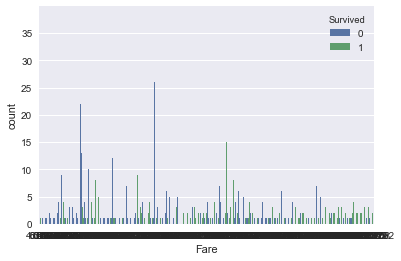

In [214]:
# how to see volume
sns.countplot(train['Fare'], hue=train['Survived']);

In [215]:
train[['Age','Survived']].groupby(['Age'], as_index=False).agg(['mean', 'count'])
#until 5 survived is easy.

Survived      
           mean count
Age                  
0.42   1.000000     1
0.67   1.000000     1
0.75   1.000000     2
0.83   1.000000     2
0.92   1.000000     1
1.00   0.714286     7
2.00   0.300000    10
3.00   0.833333     6
4.00   0.700000    10
5.00   1.000000     4
6.00   0.666667     3
7.00   0.333333     3
8.00   0.500000     4
9.00   0.250000     8
10.00  0.000000     2
11.00  0.250000     4
12.00  1.000000     1
13.00  1.000000     2
14.00  0.500000     6
14.50  0.000000     1
15.00  0.800000     5
16.00  0.352941    17
17.00  0.461538    13
18.00  0.346154    26
19.00  0.360000    25
20.00  0.200000    15
20.50  0.000000     1
21.00  0.208333    24
22.00  0.407407    27
23.00  0.333333    15
...         ...   ...
44.00  0.333333     9
45.00  0.416667    12
45.50  0.000000     2
46.00  0.000000     3
47.00  0.111111     9
48.00  0.666667     9
49.00  0.666667     6
50.00  0.500000    10
51.00  0.285714     7
52.00  0.500000     6
53.00  1.000000     1
54.00  0.375000     8
55.00  0.500000     2
55.50  0.000000     1
56.00  0.500000     4
57.00  0.000000     2
58.00  0.600000     5
59.00  0.000000     2
60.00  0.500000     4
61.00  0.000000     3
62.00  0.500000     4
63.00  1.000000     2
64.00  0.000000     2
65.00  0.000000     3
66.00  0.000000     1
70.00  0.000000     2
70.50  0.000000     1
71.00  0.000000     2
74.00  0.000000     1
80.00  1.000000     1

[88 rows x 2 columns]

In [153]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).agg(['mean', 'count'])
#more than 3 is pretty bad

Survived      
           mean count
Parch                
0      0.343658   678
1      0.550847   118
2      0.500000    80
3      0.600000     5
4      0.000000     4
5      0.200000     5
6      0.000000     1

In [154]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
#Cherbourg has more survived people

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


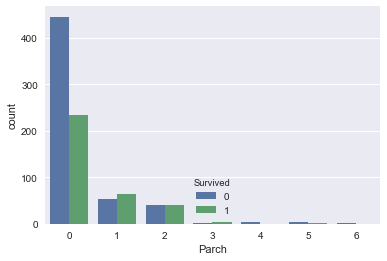

In [155]:
# how to see volume
sns.countplot(train['Parch'], hue=train['Survived'])

In [156]:
#obtengo el título del nombre y genero una nueva variable con él
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].head()
train['Survived'].groupby(train['Name_Title']).agg(['mean', 'count'])
# Mr. is very good! 517 persons with 0.15% (They didn't survived)

,mean,count
Name_Title,,
Capt.,0.000000,1
Col.,0.500000,2
Don.,0.000000,1
Dr.,0.428571,7
Jonkheer.,0.000000,1
Lady.,1.000000,1
Major.,0.500000,2
Master.,0.575000,40
Miss.,0.697802,182


In [157]:
train['Name_Len']=train['Name'].apply(lambda x: len(x))
train.head()
train['Survived'].groupby(train['Name_Len']).agg(['mean', 'count'])
#the longer the better

,mean,count
Name_Len,,
12,0.500000,2
13,0.500000,2
14,0.333333,3
15,0.133333,15
16,0.230769,26
17,0.214286,42
18,0.200000,50
19,0.234375,64
20,0.282051,39


In [158]:
#Feature Engineering
#I create new variables. here the len of name
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test
#I create Name_len and Name_title instead of name

In [159]:
#I create 3 categories to SibSp
def sibsp_cat(train, test):
    for i in [train, test]:
        i['SibSp_cat'] = np.where((i['SibSp']).isin ([1]) , 'Bueno',                                  
                                  np.where((i['SibSp']).isin ([0,2]) , 'Regular','Malo'))
                                    
                                    
        del i['SibSp']
    return train, test

In [160]:
#I create 2 categories to Parch
def parch_cat(train, test):
    for i in [train, test]:
        i['Parch_cat'] = np.where((i['Parch']).isin ([0,4,5,6]) , 'Malo','Bueno')                          
                                    
        del i['Parch']
    return train, test

In [ ]:
#I had errors in prediction because Fare has missing in test.csv
test['Fare'].isnull().values.any()

In [224]:
#I deal with missing values
def missing(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('C')#because missing is better
        i['Cabin'] = i['Cabin'].fillna('MM')
        i['Age'] = i['Age'].fillna(0)#because missing is better
        i['Fare'] = i['Fare'].fillna(0)#because missing is worse (I hope)
    return train, test


In [217]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test


In [177]:
def drop_fare(train, test, bye = ['Fare']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [163]:
#I execute sibsp_cat and parch_cat to create a dummies with new categories
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'SibSp_cat','Parch_cat']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [226]:

train, test = names(train, test)
train, test = sibsp_cat(train, test)
train, test = parch_cat(train, test)
train, test = missing(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket',
                                                                     'Cabin', 'Name_Title', 'Parch_cat','SibSp_cat'])
train, test = drop(train, test)
#train, test = drop_fare(train, test)


In [227]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)


0.8328


In [228]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]


,variable,importance
1,Fare,0.109803
2,Name_Len,0.105372
7,Sex_female,0.104961
6,Sex_male,0.103868
164,Name_Title_Mr.,0.100603
0,Age,0.080272
3,Pclass_3,0.047467
126,Cabin_MM,0.037701
166,Name_Title_Miss.,0.037099
165,Name_Title_Mrs.,0.033166


In [239]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('C:/Users/Q7835/Documents/GitHub/titanic', 'test.csv'))
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('test_pw.csv', sep=",", index = False)
